<a href="https://colab.research.google.com/github/fahadshakeel23/DataScience/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries & Load Data

In [37]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [30]:
# Load MNIST: returns train/test splits (no local file needed)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


Step 2: Preprocess The Data

In [31]:
# Normalize pixel values for neural network stability
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# CNNs expect 4D (samples, height, width, channels).
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels for 10 classes (0-9)
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


Step 3: Explore The Data

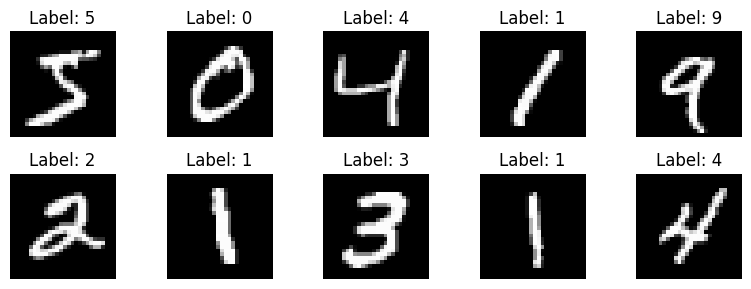

In [32]:
# Visualize some digits
plt.figure(figsize=(8,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Step 4: Build The CNN Model

In [33]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


Step 5: Compile The Model

In [34]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Step 6: Train The Model

In [35]:
history = model.fit(
    X_train, y_train_cat,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test_cat)
)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 52ms/step - accuracy: 0.8858 - loss: 0.3805 - val_accuracy: 0.9842 - val_loss: 0.0512
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.9861 - loss: 0.0447 - val_accuracy: 0.9861 - val_loss: 0.0451
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9905 - loss: 0.0321 - val_accuracy: 0.9904 - val_loss: 0.0301
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9927 - loss: 0.0237 - val_accuracy: 0.9892 - val_loss: 0.0328
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.9951 - loss: 0.0158 - val_accuracy: 0.9888 - val_loss: 0.0340


Step 7: Plot Training History (Accuracy/Loss)


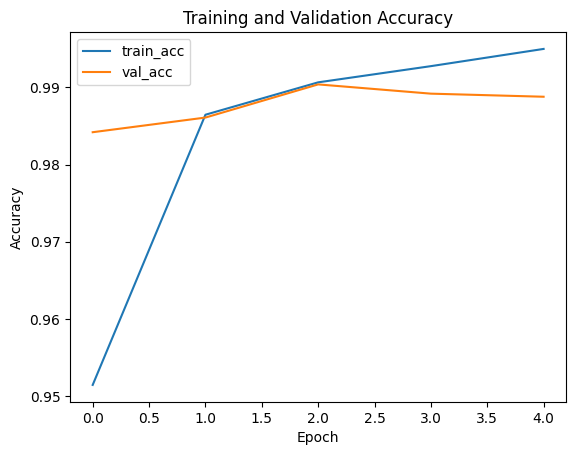

In [36]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Step 8: Evaluate The Model

In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_acc: 4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9854 - loss: 0.0452
Test accuracy:  0.988800


Step 9: Predict and Visualize Results

In [39]:
sample = X_test[0].reshape(1,28,28,1)
pred = model.predict(sample)
print(f"Predicted label: {np.argmax(pred)}; True label: {y_test[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted label: 7; True label: 7
